In [69]:
import pandas as pd
import plotnine as p9
import math

In [37]:
dframe_discounts = pd.DataFrame({
    'cost' : [0, 20,25,30,50],
    'discount_pct' : [0, 25,35,45,55],
    'cumulative_cost' : [0, 20,45,75,125]

})

dframe_discounts.index.name = "upgrade_level"
dframe_discounts

,cost,discount_pct,cumulative_cost
upgrade_level,,,
0,0,0,0
1,20,25,20
2,25,35,45
3,30,45,75
4,50,55,125


In [130]:
calculate_savings(10, 312)

At level 0, you can buy 31 units with a remainder of 2
At level 1, you can buy 36 units with a remainder of 4
At level 2, you can buy 38 units with a remainder of 1
At level 3, you can buy 39 units with a remainder of 3
At level 4, you can buy 37 units with a remainder of 2


[[312, 0, 31, 2],
 [312, 1, 36, 4],
 [312, 2, 38, 1],
 [312, 3, 39, 3],
 [312, 4, 37, 2]]

In [131]:
def calculate_savings(unit_cost : int,
                      starting_amount : int,
                      verbose=True
                     ):
    
    MAX_NUMBER_OF_UNITS = 100
    def compute(level, budget, cost, verbose = True):
        max_unit_bought : int =  int(math.floor( budget / cost ))
        unit_bought = min(MAX_NUMBER_OF_UNITS, max_unit_bought)
        remainder : int = budget - unit_bought*cost            
        if verbose: 
            print( f"At level {level}, you can buy {unit_bought} units with a remainder of {remainder}" )
        return [level, unit_bought, remainder]

    arr_cost_per_level = []
    for shop_upgrade in dframe_discounts.iterrows():
        n_upgrade = shop_upgrade[0]
        level_data = shop_upgrade[1]
        
        budget_after_upgrade : int = starting_amount - level_data['cumulative_cost']
        discounted_cost : int = int(math.ceil( unit_cost - (unit_cost * level_data['discount_pct']/100 )  ) )
    
        result : list = compute(n_upgrade, budget_after_upgrade, discounted_cost, verbose=verbose)
        arr_cost_per_level.append( [starting_amount] + result )
        
    return arr_cost_per_level

    

In [132]:
_= calculate_savings(10, 100)

At level 0, you can buy 10 units with a remainder of 0
At level 1, you can buy 10 units with a remainder of 0
At level 2, you can buy 7 units with a remainder of 6
At level 3, you can buy 4 units with a remainder of 1
At level 4, you can buy -5 units with a remainder of 0


In [133]:
_ = calculate_savings(10, 300)

At level 0, you can buy 30 units with a remainder of 0
At level 1, you can buy 35 units with a remainder of 0
At level 2, you can buy 36 units with a remainder of 3
At level 3, you can buy 37 units with a remainder of 3
At level 4, you can buy 35 units with a remainder of 0


In [134]:
arr_cost_per_starting_amount = []
for i in range(1, 11):
    arr_cost_per_starting_amount +=  calculate_savings(10, i * 100, verbose=False) 

In [135]:
dframe_cost_per_token = pd.DataFrame( arr_cost_per_starting_amount )
dframe_cost_per_token.columns = ["starting_amount", "level_upgrade", "units_bought", "remainder" ] 
dframe_cost_per_token.head()

,starting_amount,level_upgrade,units_bought,remainder
0,100,0,10,0
1,100,1,10,0
2,100,2,7,6
3,100,3,4,1
4,100,4,-5,0


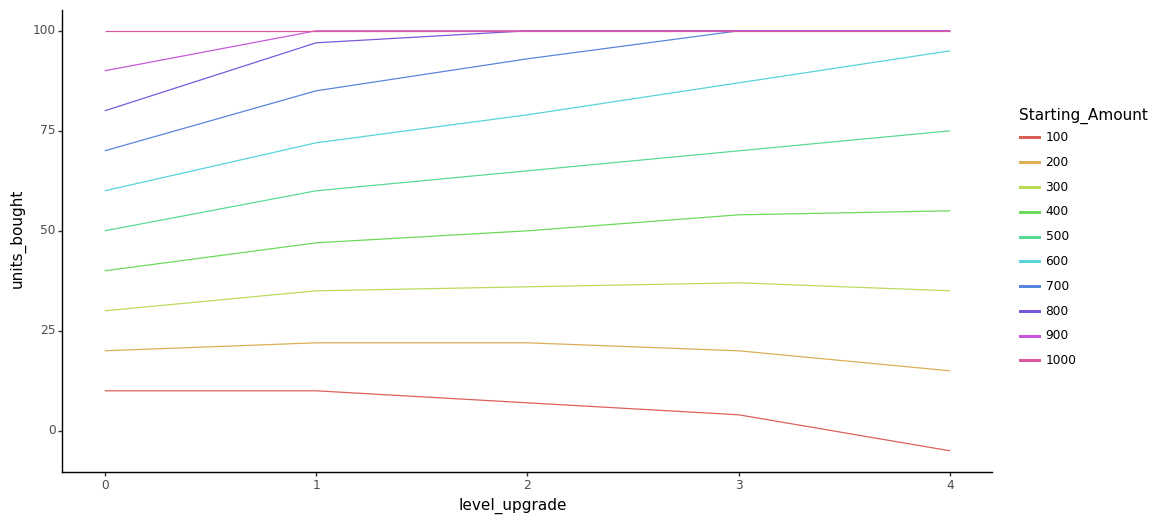

<ggplot: (8754078520052)>

In [136]:
p9.options.figure_size = 12,6

display(
    p9.ggplot(dframe_cost_per_token.assign(Starting_Amount = pd.Categorical( dframe_cost_per_token["starting_amount"] ) ) ) +
    p9.aes(x = "level_upgrade", y = "units_bought", color = "Starting_Amount") +
    p9.geom_line() + 
    #p9.facet_wrap("starting_amount", ncol = 5) +
    p9.theme_classic()
)

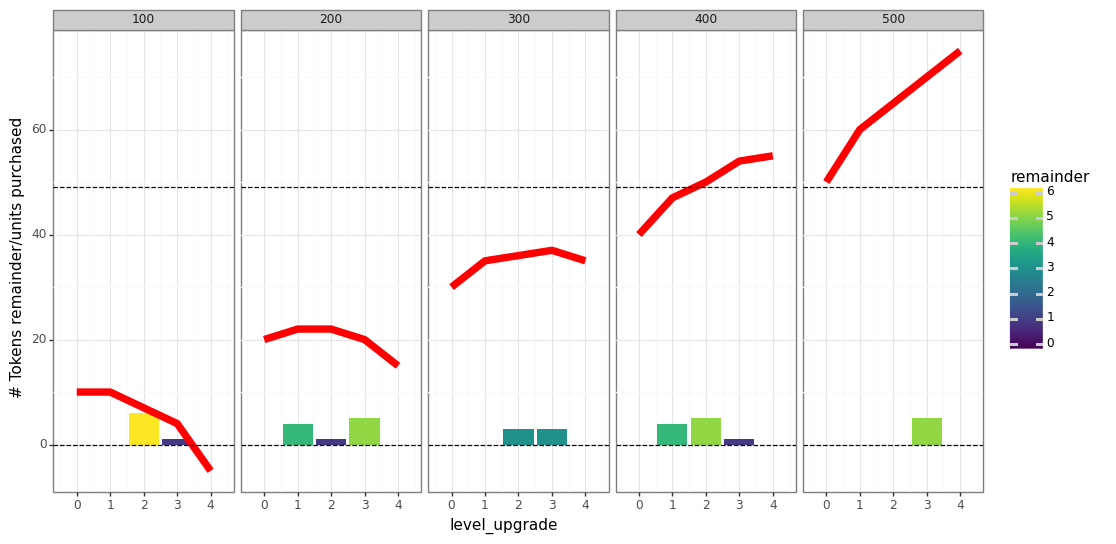

<ggplot: (8754076623376)>

In [137]:
p9.options.figure_size = 12,6

display(
    p9.ggplot(dframe_cost_per_token.assign(Starting_Amount = pd.Categorical( dframe_cost_per_token["starting_amount"] )).query("starting_amount < 600"))  +
    p9.geom_bar(mapping = p9.aes(x = "level_upgrade", y = "remainder", fill = "remainder"), stat="identity" ) +     
    p9.geom_line(mapping = p9.aes(x = "level_upgrade", y = "units_bought"), color = "red", size = 3) + 
    p9.geom_hline(yintercept = 0, linetype = "dashed") + 
    p9.geom_hline(yintercept = 49, linetype = "dashed") + 
    p9.facet_wrap("starting_amount", ncol = 5) +
    p9.ylab("# Tokens remainder/units purchased") + 
    p9.theme_bw()
)